<p style="background-color:gold">Nearest Neighbor Classifier for handwritten digit recognition</p>
<span style="color:red">Goal:  </span>  Building a classifier that takes an image of a handwritten digit and outputs a lebel 0-9<br></br>
<span style="color:red">Dataset:  </span> MNIST dataset

In [4]:
#Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<p style="background-color:gold">Importing the data that is in shape of <span style="color:orange">.npy file</span></p>
<p style="background-color:orange">What is an NPY file?</p>
<p>An NPY file is a NumPy array file created by the Python software package with the NumPy library installed. It contains an array saved in the NumPy (NPY) file format. NPY files store all the information required to reconstruct an array on any computer, which includes dtype and shape information.</p>
<p style="color:red">Training and Test data and their labels are saved in separate npy files</p>

In [10]:
#Loading the data
root_address = '/Users/fatemeh/Desktop/MicroMasters|MachineLearning/NN_MNIST/NN_MNIST/MNIST' 

#Training data and their lables
train_data = np.load(root_address + '/train_data.npy')
train_labels = np.load(root_address + '/train_labels.npy')

#Test data and their labels
test_data = np.load(root_address + '/test_data.npy')
test_labels = np.load(root_address + '/test_labels.npy')

In [18]:
#Test data consists of 1000 rows (images of digits), 
#which each of them consist of 784 values between 0 and 255
print("test data: ", test_data.shape, "test data labels: ",test_labels.shape)
print("training data: ", train_data.shape, "training data labels: ",train_labels.shape)

test data:  (1000, 784) test data labels:  (1000,)
training data:  (7500, 784) training data labels:  (7500,)


<p style="background-color:gold">How many numbers of each<span style="color:red"> digit </span>exist in the labels of the train and test set?</p>

In [28]:
#We can either create a dictionary
digit_count = {}
for digit in train_labels:
    if digit in digit_count:
        digit_count[digit] +=1
    else:
        digit_count[digit] = 1
digit_count

{0: 750,
 1: 750,
 2: 750,
 3: 750,
 4: 750,
 5: 750,
 6: 750,
 7: 750,
 8: 750,
 9: 750}

In [32]:
#Or utilize unique function of numpy library
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set: ", train_digits, train_counts)
test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set: ", test_digits, test_counts)

Training set:  [0 1 2 3 4 5 6 7 8 9] [750 750 750 750 750 750 750 750 750 750]
Test set:  [0 1 2 3 4 5 6 7 8 9] [100 100 100 100 100 100 100 100 100 100]


<p style="background-color:gold">Depicting the<span style="color:red"> Picture </span>of a random digit</p>

In [47]:
x = train_data[7499] #Opting the last digit in the training set
x

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 106., 234., 255., 254.,  94.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

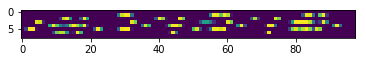

In [58]:
plt.imshow(x.reshape(8,98)) #in the reshape, we can specify the dimentions of the image

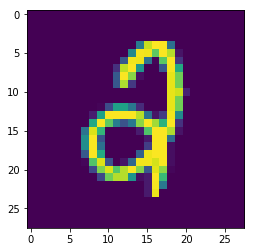

In [59]:
#But, since we know that the image is 28 by 28, we set it right
plt.imshow(x.reshape(28,28))

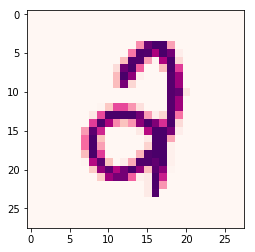

In [61]:
#For specifying the colors of the shape we use cmap
plt.imshow(x.reshape(28,28), cmap=plt.cm.RdPu)

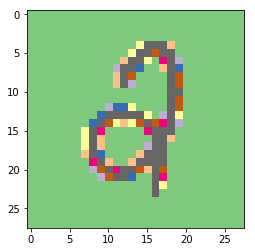

In [62]:
plt.imshow(x.reshape(28,28), cmap=plt.cm.Accent)

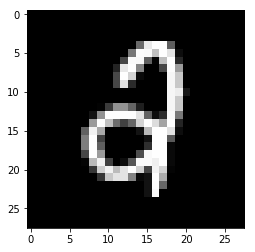

In [66]:
#The actual image
plt.imshow(x.reshape(28,28), cmap=plt.cm.gray)

<p style="background-color:gold">A function for showing a specific image (digit)</p>

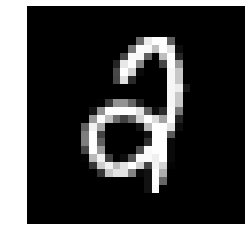

In [82]:
def show_digit_image(x):
    plt.axis('off') #hides the axis
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    #plt.show()
    return
show_digit_image(x)

<p style="background-color:gold">A function for showing a specific <span style="color:red">image(digit)</span> and it's <span style="color:red">label</span> by it's index</p>

6


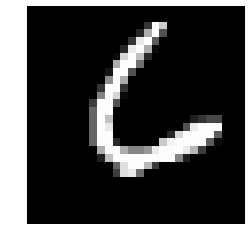

In [124]:
def show_image_by_index(index, dataset='training'):
    if dataset == 'training':
        if index < train_data.shape[0]:
            show_digit_image(train_data[index])
            label = train_labels[index]
            print(label)
        else: 
            return ("Upper bound Error")
    else:
        if index < test_data.shape[0]:
            show_digit_image(test_data[index])
            label = test_labels[index]
            print(label)
        else: 
            return ("Upper bound Error")
show_image_by_index(5, 'test')

<p style="background-color:gold">Squared Euclidean distance</p>
<p>Is one of the approaches for calculating the distance between images in order to figure out their labels with their <span style="color:red">nearest neighbors</span></p>
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$

<p style="background-color:gold">A function for calculating the Squared Euclidean distance between two points</p>

In [157]:
def squared_euclidean_distance(first, second):
    return sum(np.square(first-second))
#Euclidean distance between the first digit in training set and test set
print("Distance from a 9 and a 0 :", squared_euclidean_distance(train_data[0], test_data[0]))

Distance from a 9 and a 0 : 8291840.0


9
0


(None, None)

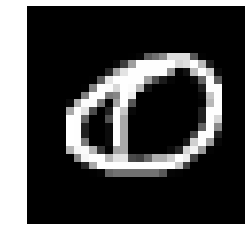

In [158]:
show_image_by_index(0), show_image_by_index(0, 'test')

<p style="background-color:gold">Computing Nearest Neighbors</p>

In [206]:
#A function that takes a digit array and finds it's nearest neighbor by calculating euclidean distance
def find_nearest_neighbor(x):
    distances = []
    for i in range(len(train_labels)):
        distances.append(squared_euclidean_distance(x, train_data[i]))
    return np.argmin(distances)
print("The minimum distance from the digit to training set digits",find_nearest_neighbor(train_data[100]))

The minimum distance from the digit to training set digits 100


In [208]:
find_nearest_neighbor(test_data[100])

4711

In [192]:
def find_NN(x):
    # Compute distances from x to every row in train_data
    distances = [squared_dist(x,train_data[i,]) for i in range(len(train_labels))]
    # Get the index of the smallest distance
    return np.argmin(distances)
def NN_classifier(x):
    # Get the index of the the nearest neighbor
    index = find_NN(x)
    # Return its class
    return train_labels[index]
NN_classifier(train_data[0])

9